In [1]:
!pip install gluoncv mxnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 5.1 MB/s 
     |████████████████████████████████| 49.1 MB 111 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [2]:
from gluoncv import model_zoo, data,utils

In [3]:
model = model_zoo.get_model('yolo3_darknet53_voc', pretrained=True)

223070KB [00:05, 42443.17KB/s]                            


In [4]:
im_fname = utils.download('https://raw.githubusercontent.com/zhreshold/' +
                          'mxnet-ssd/master/data/demo/dog.jpg',
                          path='dog.jpg')
x, img = data.transforms.presets.yolo.load_test(im_fname, short=512)
print('Shape of pre-processed image:', x.shape)

100%|██████████| 160/160 [00:00<00:00, 6866.62KB/s]

Shape of pre-processed image: (1, 3, 512, 683)


In [5]:
class_IDs, scores, bounding_boxes = model(x)
print(class_IDs, scores, bounding_boxes)


[[[11.]
  [ 6.]
  [ 1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]]]
<NDArray 1x100x1 @cpu(0)> 
[[[ 0.9992132]
  [ 0.9964369]
  [ 0.9948415]
  [-1.       ]
  [-1.       ]
  [-1.       ]
  [-1.       ]
  [-1.       ]
  [-1.       ]
  [-1.       ]
  [-1.       ]
  [-1

In [6]:
model.classes

('aeroplane',
 'bicycle',
 'bird',
 'boat',
 'bottle',
 'bus',
 'car',
 'cat',
 'chair',
 'cow',
 'diningtable',
 'dog',
 'horse',
 'motorbike',
 'person',
 'pottedplant',
 'sheep',
 'sofa',
 'train',
 'tvmonitor')

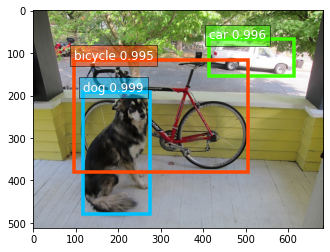

In [7]:
from matplotlib import pyplot as plt

ax = utils.viz.plot_bbox(img, bounding_boxes[0], scores[0], class_IDs[0], class_names=model.classes)

plt.show()

In [8]:
class_IDs


[[[11.]
  [ 6.]
  [ 1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]]]
<NDArray 1x100x1 @cpu(0)>

In [10]:
model = model_zoo.get_model('mask_rcnn_resnet50_v1b_coco', pretrained=True)

100%|██████████| 131497/131497 [00:02<00:00, 60659.68KB/s]


In [9]:
im_fname = utils.download('https://github.com/dmlc/web-data/blob/master/' +
                          'gluoncv/detection/biking.jpg?raw=true',
                          path='biking.jpg')
x, orig_img = data.transforms.presets.rcnn.load_test(im_fname)

100%|██████████| 244/244 [00:00<00:00, 9868.47KB/s]


In [11]:
ids, scores, bboxes, masks = [xx[0].asnumpy() for xx in model(x)]

width, height = orig_img.shape[1], orig_img.shape[0]
masks, _ = utils.viz.expand_mask(masks, bboxes, (width, height), scores)
orig_img = utils.viz.plot_mask(orig_img, masks)

In [12]:
print(masks)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


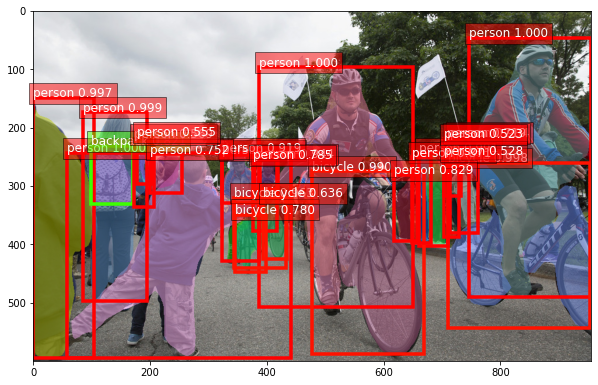

In [15]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax = utils.viz.plot_bbox(orig_img, bboxes, scores, ids, class_names=model.classes, ax=ax)

plt.show()

In [19]:
from matplotlib import pyplot as plt
from gluoncv import model_zoo, data, utils
from gluoncv.data.transforms.pose import detector_to_alpha_pose, heatmap_to_coord_alpha_pose

In [20]:
detector = model_zoo.get_model('yolo3_mobilenet1.0_coco', pretrained=True)
pose_net = model_zoo.get_model('alpha_pose_resnet101_v1b_coco', pretrained=True)

detector.reset_class(["person"], reuse_weights=['person'])

88993KB [00:01, 55589.75KB/s]                           


216179KB [00:03, 57480.63KB/s]                            


In [21]:
im_fname = utils.download('https://github.com/dmlc/web-data/blob/master/' +
                          'gluoncv/pose/soccer.png?raw=true',
                          path='soccer-pose.png')

x, img = data.transforms.presets.yolo.load_test(im_fname, short=512)
print('Shape of pre-processed image:', x.shape)

class_IDs, scores, bounding_boxs = detector(x)

1562KB [00:00, 28268.36KB/s]            

Shape of pre-processed image: (1, 3, 512, 605)


In [23]:
pose_input, upscale_bbox = detector_to_alpha_pose(img, class_IDs, scores, bounding_boxs)

In [24]:
predicted_heatmap = pose_net(pose_input)
pred_coords, confidence = heatmap_to_coord_alpha_pose(predicted_heatmap, upscale_bbox)

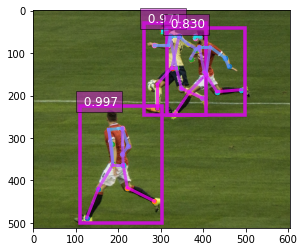

In [25]:
ax = utils.viz.plot_keypoints(img, pred_coords, confidence, class_IDs, bounding_boxs, scores, box_thresh=0.5, keypoint_thresh=0.2)
plt.show()